In [15]:
import networkx as nx
import pandas as pd

In [80]:
peop_info=pd.read_feather("../../data/interim/work_school_home_sp_esc.feather")

In [2]:
g_pickle = '../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle'

In [4]:
G = nx.read_gpickle(g_pickle)

In [7]:
prhome = 0.06
p_r = {
    'home'    :  prhome,
    'neighbor':  .1*prhome,
    'work'    :  .1*prhome,
    'school'  :  .15*prhome,
}

In [13]:
nx.write_edgelist(G, 'SP_multigraph.edgelist',
                  data=['edge_type'], delimiter=';')

In [23]:
edges = pd.read_csv('SP_multigraph.edgelist', sep=';', header=None,
                   names=['source', 'target', 'edge_type'])
edges['weight'] = edges.edge_type.map(p_r)

In [25]:
Gg = nx.from_pandas_edgelist(edges,
                             edge_attr=['weight'])

In [27]:
import community as community_louvain

In [28]:
partition = community_louvain.best_partition(Gg, weight='weight')

In [34]:
import seaborn as sns

131


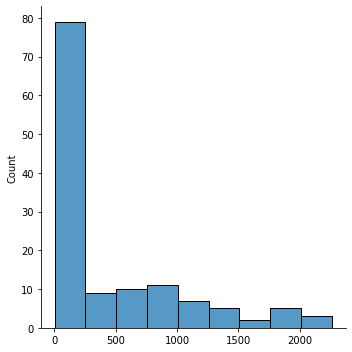

In [43]:
print(pd.Series(partition.values()).unique().size)
sns.displot(pd.Series(partition.values()).value_counts().values);

In [44]:
pd.Series(partition.values()).value_counts()

35     2263
39     2206
36     2182
2      1905
58     1895
       ... 
18        2
114       2
84        2
116       2
127       2
Length: 131, dtype: int64

In [47]:
prhome = 0.06
p_r_nohomes = {
    'home'    :  0,
    'neighbor':  .1*prhome,
    'work'    :  .1*prhome,
    'school'  :  .15*prhome,
}

In [48]:
edges['weightnoHome'] = edges.edge_type.map(p_r_nohomes)

In [49]:
Gg = nx.from_pandas_edgelist(edges,
                             edge_attr=['weightnoHome'])

In [50]:
partition = community_louvain.best_partition(Gg,
                                             weight='weightnoHome',
                                            )

131


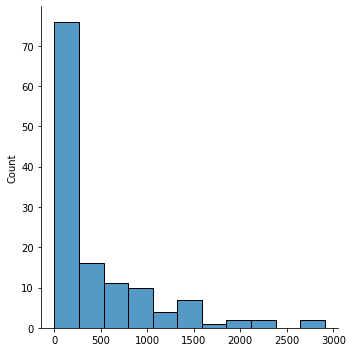

In [51]:
print(pd.Series(partition.values()).unique().size)
sns.displot(pd.Series(partition.values()).value_counts().values);

In [62]:
vCounts = pd.Series(partition.values()).value_counts()

In [70]:
(vCounts > 2).sum(), (vCounts == 2).sum()

(99, 32)

In [71]:
(vCounts >= 100).sum()

59

In [73]:
print(vCounts.values)

[2908 2779 2273 2239 1996 1966 1803 1545 1537 1454 1426 1372 1367 1355
 1205 1204 1195 1075 1043 1036 1000  971  956  941  910  837  815  813
  756  741  708  703  690  686  685  664  639  629  616  491  489  478
  470  462  452  451  444  440  438  435  431  414  338  328  269  259
  237  230  156    9    9    7    7    6    6    6    6    5    5    5
    5    5    5    5    5    4    4    4    4    4    3    3    3    3
    3    3    3    3    3    3    3    3    3    3    3    3    3    3
    3    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2]


In [75]:
vCounts[vCounts > 100].sum() / vCounts.sum()

0.9957287292518968

In [76]:
mainCommunities = vCounts[vCounts > 100]

In [79]:
mainCommunities.shape

(59,)

In [82]:
peop_info['id'] = peop_info.index +1

In [92]:
peop_info['community'] = peop_info['id'].map(partition)

In [104]:
print(peop_info.groupby('community')['school'].apply(pd.Series.value_counts)[1].head(5)),
print(peop_info.groupby('community')['work'].apply(pd.Series.value_counts)[1].head(5)),
print(peop_info.groupby('community')['home'].apply(pd.Series.value_counts)[1].head(5))

84.0     50
87.0     20
93.0      2
31.0      1
130.0     1
Name: school, dtype: int64
88.0    75
72.0    51
32.0    38
29.0    32
37.0    28
Name: work, dtype: int64
88.0    89
34.0    34
87.0    14
32.0    12
69.0    12
Name: home, dtype: int64


In [108]:
nx.set_node_attributes(G, partition, 'community')

In [109]:
nx.write_gpickle(G, '../../data/processed/SP_multiGraph_communities.gpickle')

In [110]:
[n for n in G.nodes if n not in partition.keys()]

[16417, 17535, 20877, 41294, 54272]

In [115]:
pd.Series(partition.values()).nunique()

131

In [113]:
G.nodes[16417]['community']

KeyError: 'community'